# Дискретное преобразование Фурье (1d и 2d)

Jean Baptist Joseph Fourier (1768-1830)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Fourier2.jpg/500px-Fourier2.jpg" alt="Drawing" style="width: 200px;"/>

 -  Выдвинул совершенно сумасшедшую идею, что любая периодическая функция (а если считать что период может быть бесконечным,то вообще любая функция) может быть представлена синусами и косинусами
 - Никто из тяжеловесов того времени (Лагранж, Лаплас, Пуассон) не поверили ему и даже не стали переводить на английский, ...., аж до 1878 года. Мораль: пишите сразу по английски:)
 - !Но он был прав, и сейчас нет ни одной области в анализе дискретных сигналов (в общем везде) где бы не использовалось преобразование Фурье, если встречается слово спектр - это уже про него


## Одномерное преобразование Фурье
В общем, спектральный анализ играет большую роль в анализе сигналов.
Вообще про анализ сигналов можно почитать в [Википедии](https://en.wikipedia.org/wiki/Signal_processing) и снова в [Википедии](https://en.wikipedia.org/wiki/Digital_signal_processing) . И смотрите ссылки дальше 


[Хороший обзор про преобразование Фурье здесь](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

[А тут написано про то, что объяснение простое, на самом деле не очень простое, но мне нравится](https://habrahabr.ru/post/196374/)

Гармонический сигнал - это сигнал вида $X_t=A\sin(\omega t+\phi_0)$ 
Здесь $A$  - это амлитуда сигнала, $\omega$  -   частота, $\phi(t) = \omega t+\phi_0$ - мгновенная фаза.
Часто используют величину $f=\frac{\omega}{2\pi}$ . Это величина обратная периоду $\frac{1}{T}$ равная количеству колебаний в секунду.

Преобразование Фурье  - это представление исходного ряда в виде бесконечного набора гармонических компонент. Цель упражнений ниже  - реализовать свою версию преобразования Фурье, понять как это преобразование устроено, а потом пользоваться быстрой версией осознанно, с радостью узнавания. 

$$F(u) = \int_{-\infty}^{\infty}f(x)e^{-i2\pi ux}dx$$
$$X_k=\frac{1}{N}\sum_{n=0}^{N-1}x_n\exp (\frac{-2\pi i k n}{N}), k=0,1,...N-1$$
$$\omega_k = \frac{2*\pi*k}{N}$$

In [153]:
#https://users.fmrib.ox.ac.uk/~saad/ONBI/ONBI-Fourier_Practical_python.html

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft,ifft
import cv2 

%matplotlib inline
plt.rcParams["figure.figsize"] = (5,3)

### Комплексная экспонента
$e^z = e^{x+jy} = \cos(x)+j\sin(y)$
- Для любого комплексного числа
$$C = Re_C + j*Im_C$$
$$A_C = \sqrt(Re_C^2 + Im_C^2 ) ; \phi = \tan^{-1}\frac{Im_C}{Re_C}$$

**Комплексная экспонента** — целая голоморфная функция на всей комплексной плоскости. 

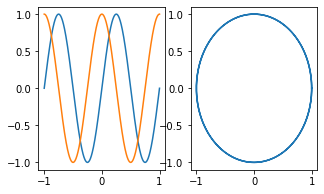

In [155]:
# Вспомним про комплексную экспоненту, что это такое и кому она нужна?
# Сгенерируйте синус заданный на интервале от -1 до 1, размер интервала  - 100 точек.
time = np.linspace(-1,1,500)
sin_wave = np.sin(2*np.pi*time)
cos_wave = np.cos(2*np.pi*time)
plt.subplot(1,2,1)
plt.plot(time,sin_wave)
plt.plot(time,cos_wave)
plt.subplot(1,2,2)
plt.plot(cos_wave, sin_wave)

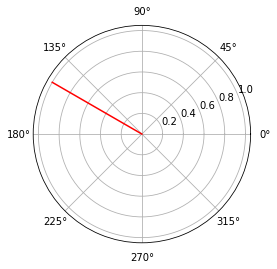

In [156]:
# А теперь комплексная экспонента
n = 150
fig,ax  = plt.subplots(ncols = 1, figsize = (4,4), subplot_kw={'projection': 'polar'})
exp_ = np.exp(1j*n*2*np.pi/360)
ax.plot([0,np.angle(exp_)], [0,np.abs(exp_)],'r')

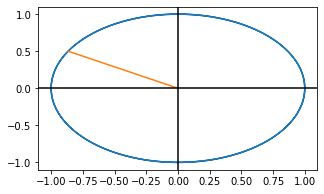

In [157]:
plt.plot(cos_wave, sin_wave)
plt.plot([0,exp_.real],[0,exp_.imag])
plt.axhline(0, color='black')
plt.axvline(0, color='black')

In [158]:
def my_Fourier(signal):
    """
    
    :param signal:  1d ndarray time series
    :return: fourier tranform
    """
    N = len(signal)
    time = np.linspace(0,1,N)
    fourier = np.zeros(N, dtype= complex)
    for fi in range(N):
        
        exp_forConv = np.exp(-1j*2*np.pi*fi*time)
        fourier[fi] = np.dot(signal,exp_forConv)
               
    fourier = fourier/N
    
    return fourier

<StemContainer object of 3 artists>

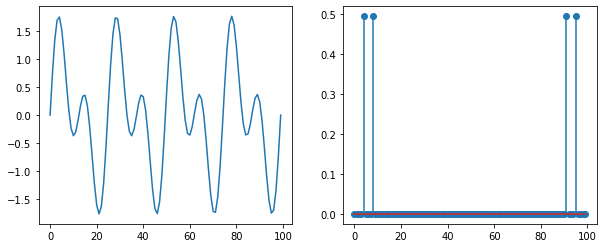

In [159]:
fig, ax =plt.subplots(ncols=2, figsize = (10,4))
time = np.linspace(-1,1,100)
sin_wave = np.sin(2*2*np.pi*time)+np.sin(2*4*np.pi*time)
fourierCoeff = my_Fourier(sin_wave)
ax[0].plot(sin_wave)
ax[1].stem(abs(fourierCoeff), use_line_collection = True)


## Положительные и отрицательные частоты?

Коэффициент числа $ k $ указывает вклад (по амплитуде и фазе) синусоидальной составляющей частоты

$$\omega_k = \frac{2 k \pi}{N}$$

Из-за вращательной симметрии комплексных экспонент положительная частота $\omega$ между $\pi$ и $2\pi$ эквивалентна отрицательной частоте $\omega - 2\pi$; это означает, что половина коэффициентов ДПФ соответствует отрицательным частотам, и когда мы сосредоточимся на физических свойствах ДПФ, вероятно, будет более целесообразно строить коэффициенты большие нуля, а амплитуду умножать на 2. В одномерном случае это так, а вот в двумерном нет
### Частота дискретизации и частота Найквиста

В преобразовании Фурье есть такие важные понятия как частота дискретизации
Частота Найквиста == половина частоты дискретизации.

Почему?

## Обратное преобразование Фурье:
Фурье пространство - это другое представление сигнала
Зная прямое преобразование Фурье можно собрать сигнал обратно
$$x_k=\sum_{n=0}^{N-1}X_n\exp (\frac{2\pi i k n}{N}), k=0,1,...N-1$$

In [160]:
#Посчитайте преобразование Фурье в ручную просто по определению (выше), напишите функцию, на вход которой подается сигнал, а на выходе - 
#коэфффициенты Фурье преобразования
def inv_Fourier(fourierCoeffs):
    N = len(fourierCoeffs)
    time = np.linspace(0,1,N)
    fourier = np.zeros(N, dtype= complex)
    for fi in range(N):
        
        exp_forConv = np.exp(1j*2*np.pi*fi*time)
        fourier[fi] = np.dot(fourierCoeffs,exp_forConv)
    
    recSignal = fourier
    return(recSignal)

Text(0.5, 1.0, 'My reconstructed signal')

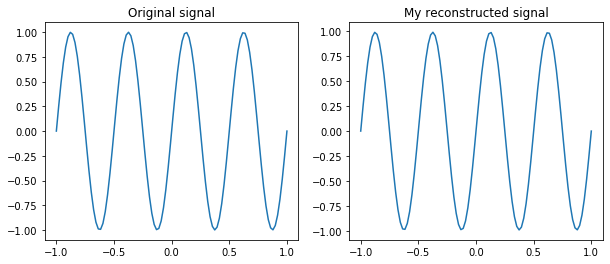

In [161]:
time = np.linspace(-1,1,100)
signal = np.sin(2*2*np.pi*time)
fig, ax =plt.subplots(ncols=2, figsize = (10,4))
ax[0].plot(time,signal); ax[0].set_title('Original signal')
fourierCoeff = my_Fourier(signal); 
recSignal = inv_Fourier(fourierCoeff)
ax[1].plot(time, recSignal.real); ax[1].set_title('My reconstructed signal')

Text(0.5, 1.0, 'Build-in fourier transform')

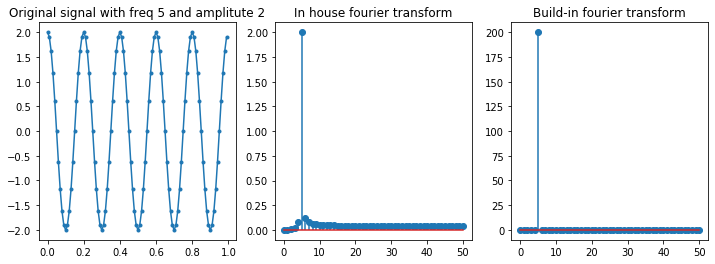

In [162]:
mag  = 2;     # magnitude (arbitrary units)
freq = 5;     # frequency in Hz
srate = 100;   # sampling rate in Hz
nyquist = srate/2
fig, ax =plt.subplots(ncols=3, figsize = (12,4))

t = np.arange(0,1.0,1.0/srate)  # time (1s of data)
#t = np.linspace(0,1,srate)
N = len(t)                       # store the number of time points
frequencies  = np.linspace(0,nyquist,int(np.floor(N/2)+1))

x = mag*np.cos(2*np.pi*freq*t)   # the signal equation
#x = mag*np.sin(2*2*np.pi*time)+mag*np.sin(2*freq*np.pi*time)
ax[0].plot(t,x,'.-'); ax[0].set_title(f'Original signal with freq {freq} and amplitute {mag}' )
ax[1].stem(frequencies,2*abs(my_Fourier(x)[:len(frequencies)]), use_line_collection = True); ax[1].set_title('In house fourier transform' )
ax[2].stem(frequencies,2*abs(np.fft.fft(x)[:len(frequencies)]), use_line_collection = True); ax[2].set_title('Build-in fourier transform' )

### Задание 1. Сигналы и их преобразование Фурье 
 - Table 3.2 стр 136  Computer Vision book
 - Сделать сигнал и получить преобразование Фурье
  
  Прямое np.fft.fft, обратное np.fft.ifft

 ##  Сэмплирование и альясинг
 
 <img src="http://habrastorage.org/storage3/010/68e/d53/01068ed534c786a15080d277016cb505.png" alt="Drawing" style="width: 500px;"/>

 <img src="https://habrastorage.org/storage3/15b/cbb/50f/15bcbb50f8c0b917891fee9f1d60f6d6.png" alt="Drawing" style="width: 500px;"/>

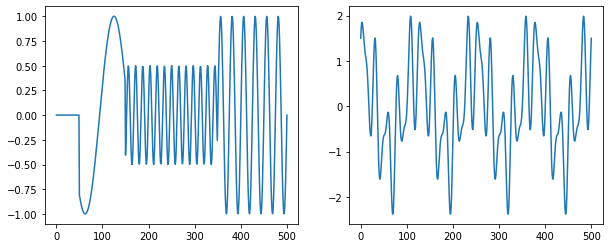

In [207]:
srate = 500
t = np.arange(0,1+1/srate,1/srate)
frequencies  = np.linspace(0,srate/2,int(np.floor(len(t)/2)+1))
signal1 = np.cos(2*np.pi*4*t)*(np.logical_and(t>=0.1,t<0.3))+np.sin(2*np.pi*20*t)*(t>0.7) + 0.5*np.cos(2*np.pi*32*t)*(np.logical_and(t>=0.3,t<0.7))
signal2 = np.cos(2*np.pi*4*t) + np.sin(2*np.pi*20*t)+ 0.5*np.cos(2*np.pi*32*t)
fig, ax = plt.subplots(ncols = 2, figsize=(10,4))
ax[0].plot(signal1)
ax[1].plot(signal2)

### Сделайте преобразование Фурье для обоих этих сигналов

Что получилось?

## Преобразование Фурье и Свертка

У преобразования Фурье есть чудесные свойства. Одно из них
$$g = f*h  = \int f(\tau)g(x-\tau)dx$$
Тогда Фурье образ

$$G(u) = \int f(\tau)g(x-\tau)e^{-j2\pi ux}dxd\tau = \int f(\tau)e^{-2\pi  i \tau u}\int h(x-\tau)e^{-i2 \pi(x-\tau)u}d(x-\tau) = F(u)H(u)$$

Что это значит?

### Вейвлеты как свертки с гауссовым ядром

In [186]:
def wavelet_morlet(f = 10, srate = 500, scale = 6):
    """
    function for compute wavelet morlet
    input:
    f (real number) - fundamental frequency of wavelet
    srate: sample rate (should be conjugate with the sample rate of real signal)
    scale - gaussian width parameter
    output: 
    wavelet kernel - numpy array in time space and 
    time axis
    """
 
    time = np.arange(-1,1+1/srate,1/srate)
    s = scale/(2*np.pi*f)  #gaussian parameter
    
    #Получаем вейвлет как свертку гауссианы и комплексной экспоненты
    wavelet = np.exp(2*np.pi*1j*f*time) * np.exp(-time**2/(2*s**2))
    return (wavelet, time)

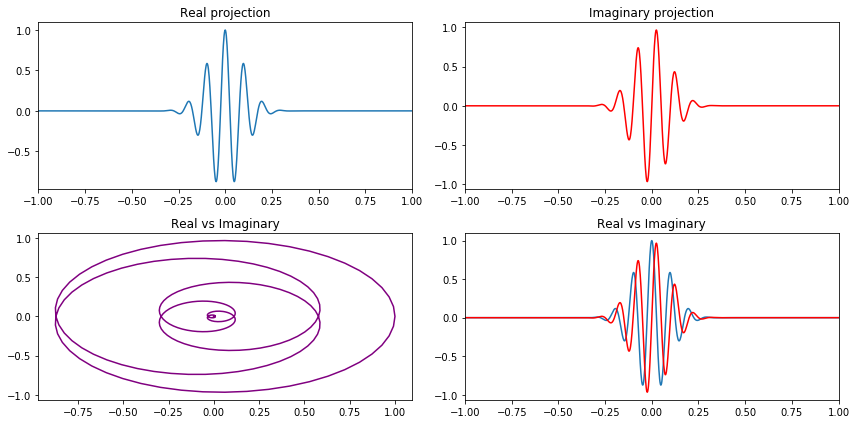

In [189]:
wavelet,time = wavelet_morlet(f = 10, srate = 500, scale = 6)
plt.figure(figsize = (12,6))
plt.subplot(221)
plt.plot(time,np.real(wavelet))
plt.xlim([-1,1])
plt.title("Real projection")


plt.subplot(222)
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Imaginary projection")


plt.subplot(223)
plt.plot(np.real(wavelet),np.imag(wavelet),'purple')
plt.title("Real vs Imaginary")

plt.subplot(224)
plt.plot(time,np.real(wavelet))
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Real vs Imaginary")

plt.tight_layout()

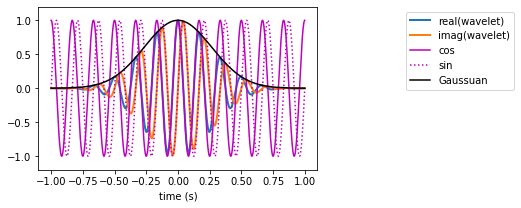

In [194]:
frequency = 6. 
srate = 500. 
scale = 10
wavelet,time = wavelet_morlet(f = f, srate = srate, scale  = scale)
#Смотрим отдельно вещественную и мнимую часть

plt.plot(time,np.real(wavelet),linewidth = 2)
plt.plot(time,np.imag(wavelet),linewidth = 2)

#Нарисуем рядышком косинус и синус с этой же частотой

plt.plot(time,np.cos(2*np.pi*frequency*time),'m')
plt.plot(time,np.sin(2*np.pi*frequency*time),'m:')

#И гауссовское окно

#Попробуйте поменять параметр, посмотрите что меняется?
s = scale/(2*np.pi*f)  #gaussian parameter
gaus_win = np.exp(-time**2/(2*s**2))
plt.plot(time,gaus_win,'k')
plt.ylim([-1.2,1.2])
plt.xlabel("time (s)")
plt.legend(["real(wavelet)","imag(wavelet)","cos","sin","Gaussuan"], bbox_to_anchor = [1.3, 1])

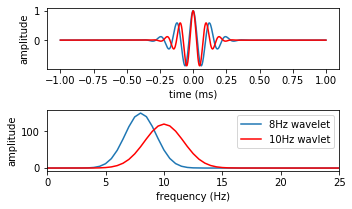

In [195]:
srate = 500
scale = 6
wavelet_8Hz, time = wavelet_morlet(f = 8, srate = srate, scale = scale)

#Второй вейвелет с частотой 10 Гц

wavelet_10Hz, time = wavelet_morlet(f = 10, srate = srate, scale = scale)

plt.subplot(211)
plt.plot(time,np.real(wavelet_8Hz))
plt.plot(time,np.real(wavelet_10Hz),'r')
plt.xlabel("time (ms)")
plt.ylabel("amplitude")

plt.subplot(212)

#сделайте массив для оси частот
hz = np.linspace(0,srate/2,int((len(time)/2.)+1));
fft_8Hz = fft(wavelet_8Hz)
fft_10Hz = fft(wavelet_10Hz)

plt.plot(hz,np.absolute(fft_8Hz[:len(hz)]))
plt.plot(hz,np.absolute(fft_10Hz[:len(hz)]),'r')

plt.xlim([0,25])
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.legend(["8Hz wavelet","10Hz wavlet"])
plt.tight_layout()

#Посмотрите на частотную картину. Почему вейвелет может быть полосным фильтром?

In [221]:
def wavelet_transform(data,srate = 500, min_freq = 3, max_freq = 40, num_freq = 15):
    """
    Function for wavelet transform computing
    
    data: time series 
    min_freq: minimal frequency of wavelet
    max_freq: max frequency of wavelet
    num_freq: number of frequency in interval from min to max
    
    """
    #Определяем параметры вейвлета
    wavetime = np.arange(-1,1+1/srate,1/srate)
    
    #нам нужна будет сетка по частоте, она должна быть такая, чтобы при низких частотах шаг был меньше, а при высоких больше.
    #Как это сделать?

    freq = np.logspace(np.log10(min_freq),np.log10(max_freq),num_freq)
    #а еще нужна сетка по параметру гауссианы
    range_cycles = [4, 8]
    s  = np.logspace(np.log10(range_cycles[0]),np.log10(range_cycles[1]),num_freq)/(2*np.pi*freq)
  

    n_wavelet = len(wavetime)
    #будем собирать пробы в один большой сигнал
    n_data = len(data)
    n_convolution = n_wavelet + n_data - 1
    half_wave = int(round(n_wavelet-1)/2)
    #инициализируйте массив частот: результат вейвлет преобразования 
    wt = np.zeros(shape = (num_freq,n_data), dtype=complex)
    
    dataX = fft(data,n_convolution)
    
    for ind, fi in enumerate(freq):
        wavelet,_ = wavelet_morlet(f = fi, srate = srate, scale = s[ind])
        waveletX = fft(wavelet,n_convolution)

        convData = ifft(waveletX * dataX)
        convData = convData[half_wave:-half_wave]
        wt[ind, :] = convData
    
  
    return (wt,freq)

In [222]:
wt,freq = wavelet_transform(data,srate = 500, min_freq = 3, max_freq = 40, num_freq = 15)

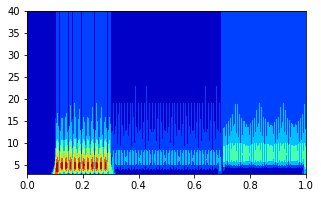

In [245]:
plt.contourf(t, freq,np.abs(wt), cmap=plt.cm.jet)

## Обобщение на 2d

Определение:
$$F(u,v)=\int\int f(x,y)e^{-j2\pi (ux+uv)}$$
Дискретная версия:
$$F(k_x,k_y) = \frac{1}{N}\sum_0^{N-1}\sum_0^{N-1} f(x,y)e^{-j\frac{2\pi (k_xx+k_yy)}{N}}$$

Но в данном 

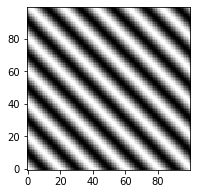

In [170]:
mag = np.zeros((100,100))   # magnitude (all zeros for now)
ph  = np.zeros((100,100))   # phase (all zeros for now)
mag[5,5] = 1                # 1 cycle in x, 2 cycles in y

y = mag*np.exp(1j*ph)           # build fft combining magnitude and phase
x = np.real(np.fft.ifft2(y))    # inverse fft (then take real part)
plt.imshow(x.T,origin='lower')                   # plot
plt.show()

In [247]:
from skimage import data, io, color

(-0.5, 450.5, 299.5, -0.5)

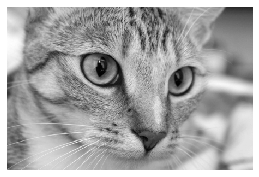

In [248]:
#cat  = color.rgb2gray(io.imread('imgs/cat.jpg'))
cat = color.rgb2gray(data.chelsea())
plt.imshow(cat, cmap = 'gray'); plt.axis('off')

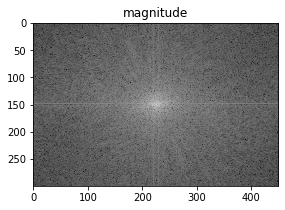

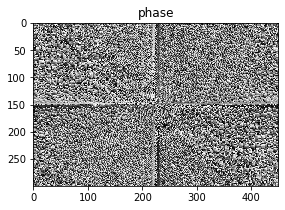

In [249]:
y = np.fft.fft2(cat)

#clim = np.quantile(np.abs(y.reshape(-1)), [.01, .99])
plt.imshow(np.fft.fftshift(np.log(np.abs(y))))
plt.gray()
plt.title('magnitude')
plt.show()

clim = np.quantile(np.angle(y.reshape(-1)), [.01, .99])
plt.imshow(np.fft.fftshift(np.angle(y)), vmin=clim[0], vmax=clim[1])
plt.title('phase')
plt.show()

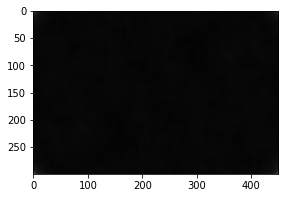

In [250]:
mag = np.abs(y)
x   = np.fft.ifft2(mag)
plt.imshow(np.abs(x))

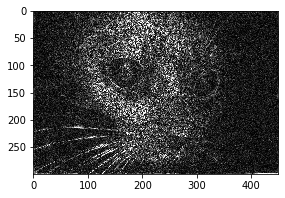

In [251]:
ph = np.angle(y)
x   = np.fft.ifft2(np.exp(1j*ph))
clim = np.quantile(np.abs(x.reshape(-1)), [0.01, 0.99])
plt.imshow(np.abs(x), vmin=clim[0], vmax=clim[1])

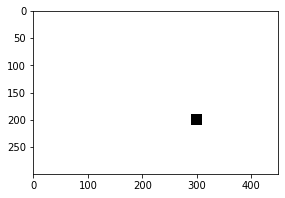

In [252]:
siz = [10, 10]  # size of the box
box = np.ones_like(cat)
box[200-siz[0]:200+siz[0],300-siz[1]:300+siz[1]] = 0
plt.imshow(box)

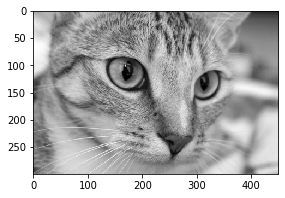

In [253]:
y = np.fft.fftshift(np.fft.fft2(cat))
y = y*box
x = np.fft.ifft2(y)
plt.imshow(np.abs(x))

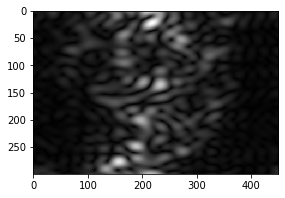

In [254]:
box = np.logical_not(box).astype(int) # this turns zeros to ones and ones to zeros
y = np.fft.fftshift(np.fft.fft2(cat))
y = y*box
x = np.fft.ifft2(y)
plt.imshow(np.abs(x))

##  Задание с кернелами: свертка с помощью FFT
Посмотрите разные картинки и их преобразование Фурье. Почему плохо выбирать такой боксик как мы сделали? И что выбирать лучше?
Есть популярный kernel  Gaussian blur? Как думаете почему?
Вы делали явную свертку, а можно это делать с помощью преобразования Фурье
 - FFT картинки
 - FFT кернела
 - Их произведение
 - IFFT  результаты


## Image blending 

Если сделать объединить низкочастутную компоненту от одной картинки и высокочастотную от другой - может получится что-то смешное.
Попробуйте